In [1]:
ls

 datasets/                               README.md
'Pedestrian Detection using SVM.ipynb'  'Support Vector machines prac1.ipynb'


In [2]:
# Neccesary imports
import numpy as np 
import cv2
import random
random.seed(42)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Data set Store variable, Here the path of mine will vary from yours
posDataSetDir="/home/gaurav/projects/openCV ML implementation/Support Vector Machines/datasets/pedestrians128x64"
negDataSetDir="/home/gaurav/projects/openCV ML implementation/Support Vector Machines/datasets/pedestrians_neg"

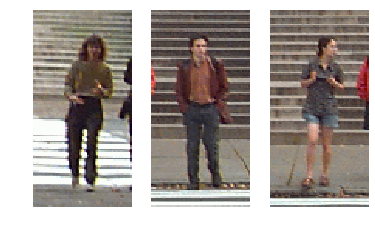

In [5]:
# Analysing the 0020,0021,0022 data set
for i in range(3):
    filename="%s/per0020%d.ppm" % (posDataSetDir,i)
    img=cv2.imread(filename)
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis("off")

In [6]:
import cv2

In [7]:
from cv2 import HOGDescriptor

In [8]:
# Necessary params for the HOG Descriptor constructor
win_size=(48,96)
block_size=(16,16)
block_strids=(8,8)
cell_size=(8,8)
num_bins=9
hog=HOGDescriptor(win_size,block_size,block_strids,cell_size,num_bins)

In [9]:
# convert the images into the hog in the positive pedestrian dataset
x_hog=[]
for i in random.sample(range(924),400):
    filename="%s/per%05d.ppm" % (posDataSetDir,i)
    img=cv2.imread(filename)
    if img is None:
        print("So sorry your specified image is not found")
        continue
    x_hog.append(hog.compute(img,(64,64)))

So sorry your specified image is not found


In [10]:
len(random.sample(range(924),400))

400

In [11]:
"%04d.ppm"%(0)

'0000.ppm'

In [12]:
#hog computed and generated the 400 samples
len(x_hog)

399

In [13]:
# determing the x feature and changing to suitable datatype and generating the target labels for all the samples
x_hog=np.array(x_hog,dtype=np.float32)
y_shape=np.ones(x_hog.shape[0],dtype=np.int32)

In [14]:
# Contains 400 target lablels indicating the presence of pedestrians
y_shape.shape

(399,)

In [15]:
# The hog compute method generated 400 hog samples each of 1980 hog features
x_hog.shape

(399, 1980, 1)

That't it we are done for the positive set of images. Now, Time to tune the negative images

In [16]:
512*512

262144

In [17]:
64*128

8192

In [18]:
(512*512)/(64*128)

32.0

That means we can divide the 512*512 image by splitting the image of dimension 64*128 , 32 times


In [19]:
import os

In [20]:
# The list of all the negative images we will be working on
os.listdir(negDataSetDir)

['cdmc318.jpg',
 'hous36.jpg',
 'bost393.jpg',
 'land22.jpg',
 'a79094.jpg',
 'a111017.jpg',
 'art1134.jpg',
 'bost101.jpg',
 'par180.jpg',
 'gre270.jpg',
 'nat1094.jpg',
 'land741.jpg',
 'nat481.jpg',
 'art1328.jpg',
 'urban976.jpg',
 'urban996.jpg',
 'land281.jpg',
 'bost100.jpg',
 'nat203.jpg',
 'nat239.jpg',
 'art238.jpg',
 'sharp34.jpg',
 'a0010.jpg',
 'urb738.jpg',
 'art761.jpg',
 'land215.jpg',
 'natu697.jpg',
 'a48009.jpg',
 'a79054.jpg',
 'ski62.jpg',
 'bost394.jpg',
 'urb728.jpg',
 'urb928.jpg',
 'land224.jpg',
 'urb784.jpg',
 'urb279.jpg',
 'natu894.jpg',
 'gre683.jpg',
 'n219007.jpg',
 'urb584.jpg',
 'art759.jpg',
 'hous126.jpg',
 'art252.jpg',
 'n213081.jpg',
 'natu778.jpg',
 'urb917.jpg',
 'land222.jpg',
 'land15.jpg',
 'nat223.jpg',
 'sharp53.jpg']

In [21]:
heightRegionOfInterest=128
widthRegionOfInterest=64

In [22]:
X_neg=[]
for neg_file in os.listdir(negDataSetDir):
    negFileDir="%s/%s" %(negDataSetDir,neg_file)
    img=cv2.imread(negFileDir)
    img=cv2.resize(img,(512,512))
    
    for j in range(5):
        rand_y=random.randint(0,img.shape[0]-heightRegionOfInterest)
        rand_x=random.randint(0,img.shape[1]-widthRegionOfInterest)
        regionOfInterest=img[rand_y:rand_y+heightRegionOfInterest,rand_x:rand_x+widthRegionOfInterest,:]    
        X_neg.append(hog.compute(regionOfInterest,(64,64)))

In [23]:
X_neg=np.array(X_neg,dtype=np.float32)
y_neg=np.zeros(X_neg.shape[0],dtype=np.int32)

In [24]:
X_neg.shape,y_neg.shape

((250, 1980, 1), (250,))

Now as we changed the negative images to the hog type 

In [25]:
X=np.concatenate((x_hog,X_neg))
y=np.concatenate((y_shape,y_neg))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
svm=cv2.ml.SVM_create()

In [29]:
svm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)

True

In [30]:
X_train.shape,y_train.shape

((519, 1980, 1), (519,))

In [31]:
_,test_pred=svm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_train,svm.predict(X_train)[1])

1.0

In [34]:
# Looks like the case of overfitting
accuracy_score(y_test,test_pred)

0.6461538461538462

In [63]:
# implementing the bootstrapping methodology for improving the svn performance
score_test=[]
score_train=[]

for index in range(3):
    bootSvm=cv2.ml.SVM_create()
    bootSvm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)
    score_train.append(accuracy_score(y_train,bootSvm.predict(X_train)[1]))
    score_test.append(accuracy_score(y_test,bootSvm.predict(X_test)[1]))
    
    _,y_pred=bootSvm.predict(X_test)
    false_positive=np.logical_and((y_test.ravel()==1),(y_pred.ravel()==-1))
    
    if not np.any(false_positive):
        print("congrats no false positive left")
        break
    
    X_train=np.concatenate((X_train,X_test[false_positive,:]),axis=0)
    y_train=np.concatenate((y_train,y_test[false_positive]),axis=0)

congrats no false positive left


In [68]:
X_test.shape

(130, 1980, 1)

In [64]:
accuracy_score(y_test,svm.predict(X_test)[1])

0.6461538461538462

In [37]:
test_path="/home/gaurav/projects/openCV ML implementation/Support Vector Machines/datasets/pedestrian_test.jpg"
img_test=cv2.imread(test_path)

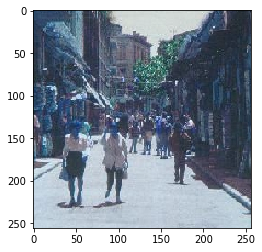

In [38]:
plt.imshow(img_test)

In [81]:
# Classifying in the larger image 
stride=16
found=[]

for ystart in np.arange(0,img_test.shape[0],stride):
    for xstart in np.arange(0,img_test.shape[1],stride):
        
        if ystart + heightRegionOfInterest>img_test.shape[0]:
            continue
        
        if xstart + widthRegionOfInterest>img_test.shape[1]:
            continue
        
        testRoi=img_test[ystart:ystart+heightRegionOfInterest,xstart:xstart+widthRegionOfInterest,:]
        test_feat=np.array([hog.compute(testRoi,(64,64))])
        
        _,testPred=svm.predict(test_feat)
        
        if np.allclose(testPred,1):
            found.append((ystart,xstart,heightRegionOfInterest,widthRegionOfInterest))

In [61]:
testRoi.shape

(128, 64, 3)

In [62]:
regionOfInterest.shape

(128, 64, 3)

In [42]:
img_test.shape

(256, 256, 3)

In [82]:
heightRegionOfInterest

128

In [86]:
rho,_,_= svm.getDecisionFunction(0)
sv=svm.getSupportVectors()
hog.setSVMDetector(np.append(sv[0, :].ravel(), rho))

In [87]:
hogdef=cv2.HOGDescriptor()

In [88]:
hogdef.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [89]:
found,_=hogdef.detectMultiScale(img_test)

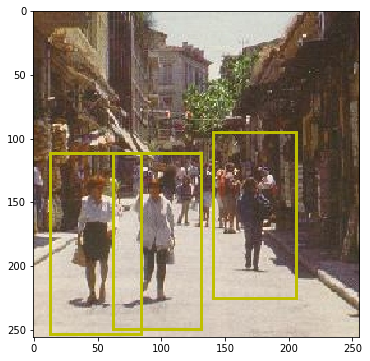

In [96]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.imshow(cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB))
from matplotlib import patches
for f in found:
    ax.add_patch(patches.Rectangle((f[0],f[1]),f[2],f[3],color='y',linewidth=3,fill=False))    